In [37]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['text.usetex'] = True


In [12]:
exps = [exp for exp in os.listdir('data/') if 'exps' in exp]

KeyboardInterrupt: 

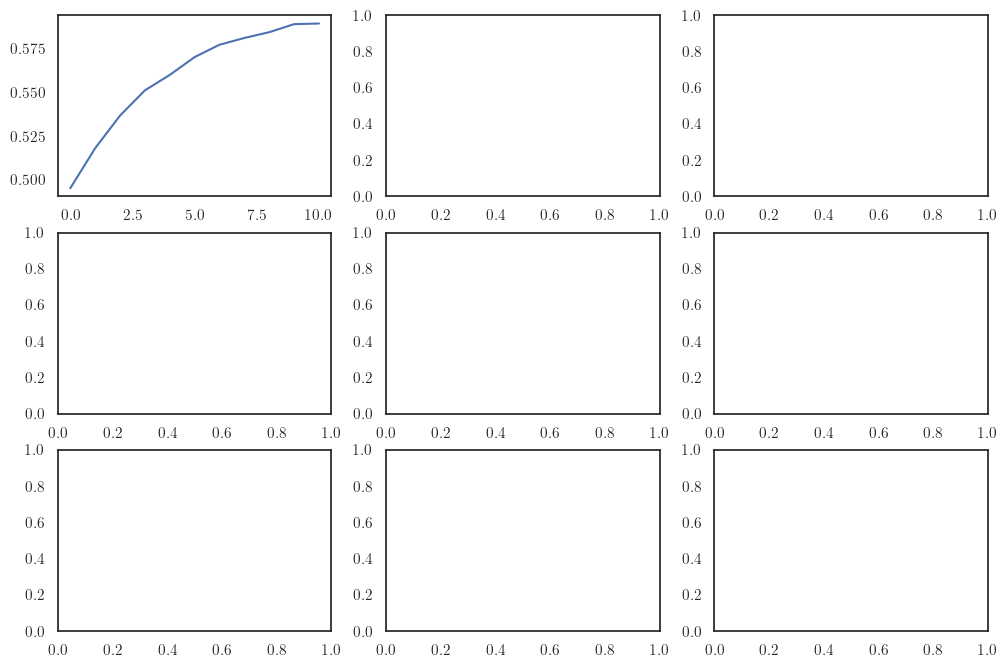

In [12]:
datasets = ['event','fiction','cutoff']
lengths = ['len1','len50','len100']
root_paths = [
    'data/exps1_tmlr/'+dataset+'_'+length for dataset in datasets for length in lengths
]
sns.set_theme(style="white")

fig, axs = plt.subplots(len(datasets), len(lengths), figsize=(12, 8))
for i, data in enumerate(datasets):
    for j, length in enumerate(lengths):
        root_path = 'data/exps1_tmlr/'+data+'_'+length
        exps = os.listdir(root_path)
        json_exps = []
        for exp in exps:
            if exp.startswith('.'):
                continue
            json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
            json_exps.append(json_exp)
        map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
        map_func = np.vectorize(map_func)
        for l in ['T','H','DK']:
            
            axs[i,j].plot((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0),label=l)
            axs[i,j].fill_between(range(len((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0))),
                            (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)-(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
                            (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)+(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
                            alpha=0.2)
        axs[0,j].set_title('Communication Length: '+length.split('len')[1], fontsize=15)

        axs[i,j].set_ylim(0,1)
        axs[i,j].legend(fontsize=18)
axs[1,1].set_xlabel('Interaction', fontsize=18)
axs[0,0].set_ylabel('Dataset: Event \n Accuracy', fontsize=18)
axs[1,0].set_ylabel('Dataset: Fiction \n Accuracy', fontsize=18)
plt.tight_layout()
plt.savefig('results/tmlr_results_exps1.png', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# Generate LaTeX table
datasets = ['event','fiction','cutoff','dataset4']  # Added 4th dataset
dataset_labels = ['Event', 'Fiction', 'Cutoff', 'Dataset4']  # Display names
lengths = ['len1','len50','len100']
length_labels = ['1', '50', '100']

# Collect statistics for each combination
results = {}
for data in datasets:
    for length in lengths:
        # Skip dataset4 if it doesn't exist in data folder
        if data == 'dataset4':
            # Use placeholder values for dataset4
            for l in ['T','H','DK']:
                results[(data, length, l)] = (0.0, 0.0)
            continue
            
        root_path = 'data/exps1_tmlr/'+data+'_'+length
        exps = os.listdir(root_path)
        json_exps = []
        for exp in exps:
            if exp.startswith('.'):
                continue
            json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
            json_exps.append(json_exp)
        
        map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
        map_func = np.vectorize(map_func)
        
        # Compute statistics for each label
        for l in ['T','H','DK']:
            # Get the final values across all experiments
            values = (np.array(map_func(json_exps))==l).mean(axis=1)[:, -1]  # Take last interaction
            mean_val = values.mean()
            std_val = values.std()
            results[(data, length, l)] = (mean_val, std_val)

# Generate LaTeX table (transposed: datasets in rows, lengths in columns)
latex_table = []
latex_table.append(r"\begin{table}[h]")
latex_table.append(r"\centering")
latex_table.append(r"\begin{tabular}{ll|ccc}")
latex_table.append(r"\hline")
latex_table.append(r"\textbf{Dataset} & \textbf{Metric} & \multicolumn{3}{c}{\textbf{Length}} \\")
latex_table.append(r"& & " + " & ".join(length_labels) + r" \\")
latex_table.append(r"\hline")

for i, data in enumerate(datasets):
    for j, l in enumerate(['T','H','DK']):
        if j == 0:
            row = [r"\multirow{3}{*}{\textbf{" + dataset_labels[i] + r"}}"]
        else:
            row = [""]
        row.append(l)
        for length in lengths:
            mean_val, std_val = results[(data, length, l)]
            row.append(f"${mean_val:.3f} \\pm {std_val:.3f}$")
        latex_table.append(" & ".join(row) + r" \\")
    if i < len(datasets) - 1:
        latex_table.append(r"\hline")

latex_table.append(r"\hline")
latex_table.append(r"\end{tabular}")
latex_table.append(r"\caption{Results across different communication lengths and datasets (transposed).}")
latex_table.append(r"\label{tab:results}")
latex_table.append(r"\end{table}")

# Print the table
latex_output = "\n".join(latex_table)
print(latex_output)


\begin{table}[h]
\centering
\begin{tabular}{ll|ccc}
\hline
\textbf{Dataset} & \textbf{Metric} & \multicolumn{3}{c}{\textbf{Length}} \\
& & 1 & 50 & 100 \\
\hline
\multirow{3}{*}{\textbf{Event}} & T & $0.589 \pm 0.412$ & $0.623 \pm 0.043$ & $0.656 \pm 0.047$ \\
 & H & $0.411 \pm 0.412$ & $0.251 \pm 0.041$ & $0.234 \pm 0.045$ \\
 & DK & $0.000 \pm 0.000$ & $0.127 \pm 0.035$ & $0.110 \pm 0.028$ \\
\hline
\multirow{3}{*}{\textbf{Fiction}} & T & $0.537 \pm 0.415$ & $0.631 \pm 0.047$ & $0.697 \pm 0.046$ \\
 & H & $0.463 \pm 0.415$ & $0.245 \pm 0.045$ & $0.206 \pm 0.042$ \\
 & DK & $0.000 \pm 0.000$ & $0.123 \pm 0.030$ & $0.098 \pm 0.030$ \\
\hline
\multirow{3}{*}{\textbf{Cutoff}} & T & $0.458 \pm 0.412$ & $0.510 \pm 0.321$ & $0.539 \pm 0.327$ \\
 & H & $0.542 \pm 0.412$ & $0.328 \pm 0.219$ & $0.306 \pm 0.220$ \\
 & DK & $0.000 \pm 0.000$ & $0.161 \pm 0.108$ & $0.155 \pm 0.115$ \\
\hline
\multirow{3}{*}{\textbf{Dataset4}} & T & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ \\
 & H

data/exps2_tmlr/event/event_inc1_80
data/exps2_tmlr/event/event_inc1_100
data/exps2_tmlr/event/event_inc2_80
data/exps2_tmlr/event/event_inc2_100
data/exps2_tmlr/event/event_inc3_80
data/exps2_tmlr/event/event_inc3_100
data/exps2_tmlr/fiction/fiction_inc1_80
data/exps2_tmlr/fiction/fiction_inc1_100
data/exps2_tmlr/fiction/fiction_inc2_80
data/exps2_tmlr/fiction/fiction_inc2_100
data/exps2_tmlr/fiction/fiction_inc3_80


KeyboardInterrupt: 

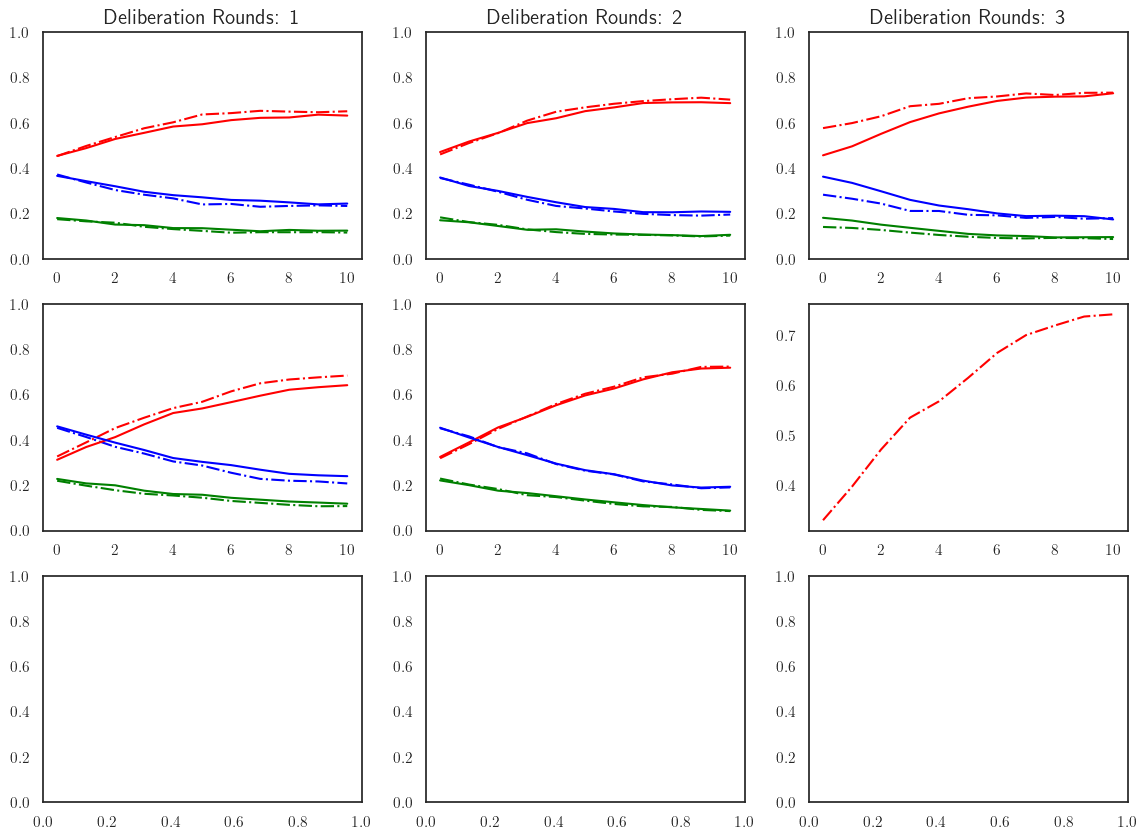

In [ ]:
datasets = ['event','fiction','cutoff']
incentives = ['inc1','inc2','inc3']
heterogeneities =['80','100']
line_styles_heterogeneity = ['-.','-']
colors_line = {
    'T': 'red',
    'H': 'blue',
    'DK': 'green'
}
sns.set_theme(style="white")
fig, axs = plt.subplots(len(datasets), len(incentives), figsize=(14, 10))
for i, data in enumerate(datasets):
    for j, incentive in enumerate(incentives):
        for k, heterogeneity in enumerate(heterogeneities):
            root_path = 'data/exps2_tmlr/'+data+'/'+data+'_'+incentive+'_'+heterogeneity
            print(root_path)
            exps = os.listdir(root_path)
            json_exps = []
            for exp in exps:
                if exp.startswith('.'):
                    continue
                json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
                json_exps.append(json_exp)
            map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
            map_func = np.vectorize(map_func)
            for l in ['T','H','DK']: 
                axs[i,j].plot((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0),label=l,linestyle=line_styles_heterogeneity[k],color=colors_line[l])
                # axs[i,j].fill_between(range(len((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0))),
                #                 (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)-(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
                #                 (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)+(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
                #                 alpha=0.2,linestyle=line_styles_heterogeneity[k])
            axs[0,j].set_title('Deliberation Rounds: '+incentive.split('inc')[1], fontsize=15)
        axs[i,j].set_ylim(0,1)
axs[2,0].set_xlabel('Interaction Rounds', fontsize=18)
axs[2,1].set_xlabel('Interaction Rounds', fontsize=18)
axs[2,2].set_xlabel('Interaction Rounds', fontsize=18)
axs[0,0].set_ylabel('Dataset: Event \n Proportion $\\rho$', fontsize=18)
axs[1,0].set_ylabel('Dataset: Fiction \n Proportion $\\rho$', fontsize=18)
axs[2,0].set_ylabel('Dataset: Cutoff \n Proportion $\\rho$', fontsize=18)
# Create custom legend entries
from matplotlib.lines import Line2D

# Legend for labels/colors
label_legend_elements = [
    Line2D([0], [0], color=colors_line['T'], lw=3, label='T (Red)'),
    Line2D([0], [0], color=colors_line['H'], lw=3, label='H (Blue)'),
    Line2D([0], [0], color=colors_line['DK'], lw=3, label='DK (Green)')
]

# Legend for heterogeneity/linestyles
hetero_legend_elements = [
    Line2D([0], [0], color='gray', linestyle='-.', lw=3, label='Heterogeneity 80\%'),
    Line2D([0], [0], color='gray', linestyle='-', lw=3, label='Heterogeneity 100\%')
]

# Combine into one legend
all_legend_elements = label_legend_elements + hetero_legend_elements

fig.legend(
    handles=all_legend_elements,
    loc='lower center',
    ncol=5,
    fontsize=14,
    bbox_to_anchor=(0.5, 0)
)

plt.savefig('results/tmlr_results_exps2.png', dpi=300, bbox_inches='tight')
plt.show()

data/exps3_tmlr/chain_bot
data/exps3_tmlr/chain_rand
data/exps3_tmlr/chain_top
data/exps3_tmlr/power_bot
data/exps3_tmlr/power_rand
data/exps3_tmlr/power_top
data/exps3_tmlr/tree_bot
data/exps3_tmlr/tree_rand
data/exps3_tmlr/tree_top


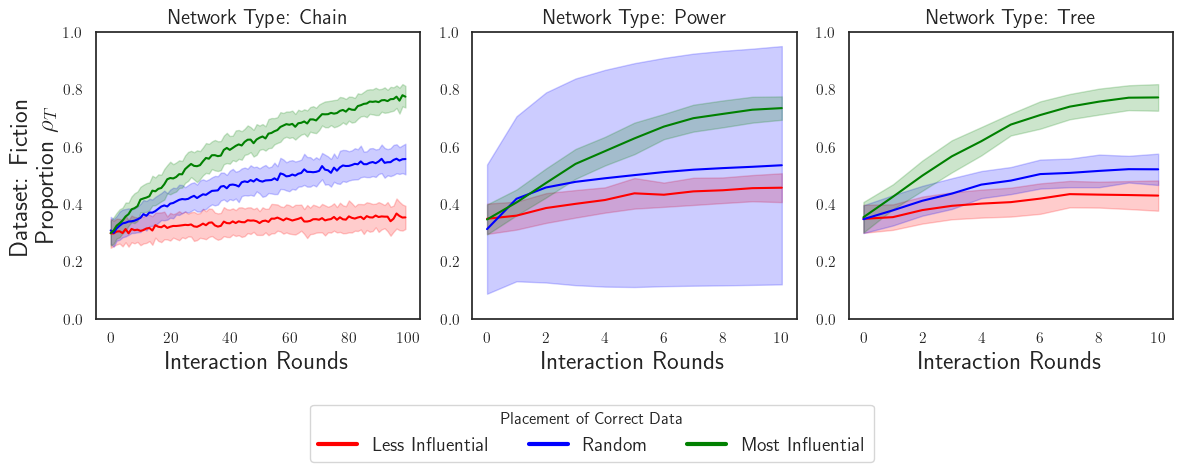

In [ ]:
network_type = ['chain','power','tree']
data_placements =['bot','rand','top']
colors_line = [
    'red',
   'blue',
'green'
]
data_placement_dict = {
    'bot': 'Less Influential',
    'rand': 'Random',
    'top': 'Most Influential'
}
line_styles_type = {
    'H': '--',
    'T': '-',
    'DK': '-.'
}
sns.set_theme(style="white")
fig, axs = plt.subplots(1, len(network_type), figsize=(12, 4))
for i, network_type in enumerate(network_type):
    for j, data_placement in enumerate(data_placements):
        root_path = 'data/exps3_tmlr/'+network_type+'_'+data_placement
        print(root_path)
        exps = os.listdir(root_path)
        json_exps = []
        for exp in exps:
            if exp.startswith('.'):
                continue
            json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
            json_exps.append(json_exp)
        map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
        map_func = np.vectorize(map_func)
        for l in ['T']: 
            axs[i].plot((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0),label=data_placement_dict[data_placement] + ' ' + l,linestyle=line_styles_type[l],color=colors_line[j])
            axs[i].fill_between(range(len((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0))),
                            (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)-(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
                            (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)+(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
                            alpha=0.2,color=colors_line[j])
    axs[i].set_title('Network Type: '+network_type.capitalize(), fontsize=15)
    axs[i].set_xlabel('Interaction Rounds', fontsize=18)
    axs[i].set_ylim(0,1)

axs[0].set_ylabel('Dataset: Fiction \n Proportion $\\rho_T$', fontsize=18)

placement_legend_elements = [
    Line2D([0], [0], color=colors_line[0], linestyle='-', lw=3, label='Less Influential'),
    Line2D([0], [0], color=colors_line[1], linestyle='-', lw=3, label='Random'),
    Line2D([0], [0], color=colors_line[2], linestyle='-', lw=3, label='Most Influential')
]

# Combine into one legend
all_legend_elements = placement_legend_elements

fig.legend(
    handles=all_legend_elements,
    loc='lower center',
    ncol=5,
    fontsize=14,
    title='Placement of Correct Data',
    bbox_to_anchor=(0.5, -0.2)
)

plt.tight_layout()
plt.savefig('results/tmlr_results_exps3.png', dpi=300,bbox_inches='tight')
plt.show()

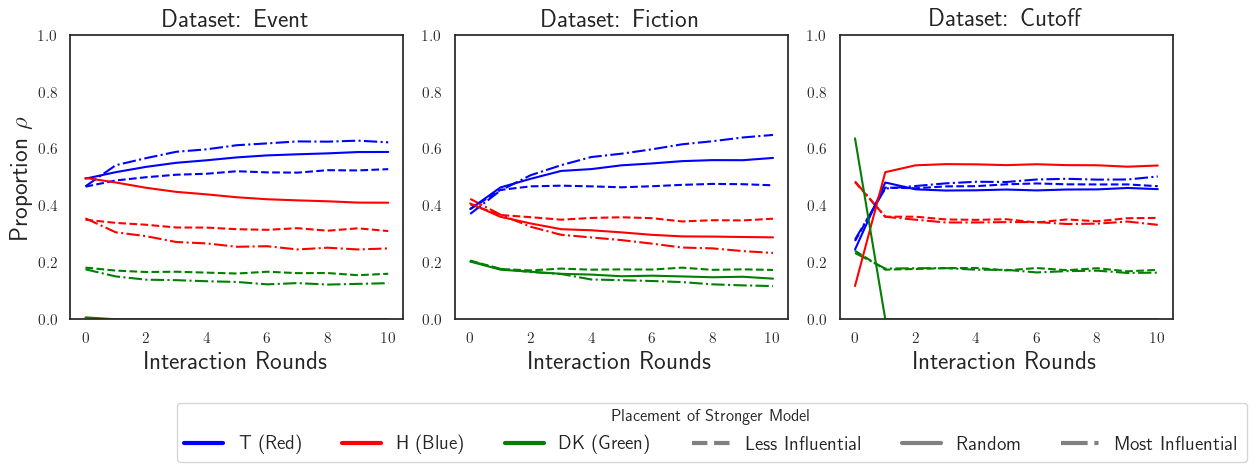

In [ ]:
datasets = ['event','fiction','cutoff']
placement_types = ['llama_strong_at_bottom','llama_strong_at_top','llama_strong_at_random']
colors_line = {
    'H': 'red',
    'T': 'blue',
    'DK': 'green'
}
data_placement_dict = {
    'llama_strong_at_bottom': 'Less Influential',
    'llama_strong_at_random': 'Random',
    'llama_strong_at_top': 'Most Influential'
}
line_styles_type = {
    'llama_strong_at_bottom': '--',
    'llama_strong_at_random': '-',
    'llama_strong_at_top': '-.'
}
sns.set_theme(style="white")
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, data in enumerate(datasets):
    for j, placement_type in enumerate(placement_types):
        root_path = 'data/exps4_tmlr/'+data+"_"+placement_type
        exps = os.listdir(root_path)
        json_exps = []
        for exp in exps:
            if exp.startswith('.'):
                continue
            json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
            json_exps.append(json_exp)
        map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
        map_func = np.vectorize(map_func)
        for l in ['T','H','DK']: 
            axs[i].plot((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0),label=data_placement_dict[placement_type] + ' ' + l,linestyle=line_styles_type[placement_type],color=colors_line[l])
            # axs.fill_between(range(len((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0))),
            #                 (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)-(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
            #                 (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)+(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
            #                 alpha=0.2,color=colors_line[i])
        axs[i].set_ylim(0,1)
    axs[i].set_xlabel('Interaction Rounds', fontsize=18)
    axs[i].set_title('Dataset: '+data.capitalize(),fontsize=18)
axs[0].set_ylabel('Proportion $\\rho$', fontsize=18)
label_legend_elements = [
    Line2D([0], [0], color=colors_line['T'], lw=3, label='T (Red)'),
    Line2D([0], [0], color=colors_line['H'], lw=3, label='H (Blue)'),
    Line2D([0], [0], color=colors_line['DK'], lw=3, label='DK (Green)')
]
placement_legend_elements = [
    Line2D([0], [0], color='gray', linestyle=line_styles_type['llama_strong_at_bottom'], lw=3, label='Less Influential'),
    Line2D([0], [0], color='gray', linestyle=line_styles_type['llama_strong_at_random'], lw=3, label='Random'),
    Line2D([0], [0], color='gray', linestyle=line_styles_type['llama_strong_at_top'], lw=3, label='Most Influential')
]

# Combine into one legend
all_legend_elements = label_legend_elements + placement_legend_elements
# all_legend_elements = all_legend_elements[::3] + all_legend_elements[1::3] + all_legend_elements[2::3]
fig.legend(
    handles=all_legend_elements,
    loc='lower center',
    ncol=6,
    fontsize=14,
    bbox_to_anchor=(0.6, -0.2),
    title='Placement of Stronger Model',
)

plt.tight_layout()
plt.savefig('results/tmlr_results_exps4.png', dpi=300,bbox_inches='tight')
plt.show()

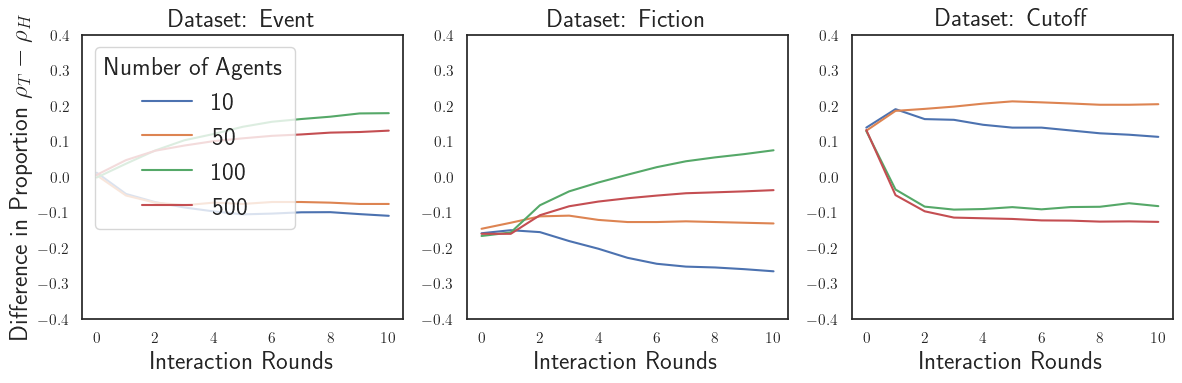

In [ ]:
# Generate LaTeX table
datasets = ['event','fiction','cutoff']
number_of_agents = ['power_p1_A_k0_s0_10_llama8B','power_p1_A_k0_s0_50_llama8B','power_p1_A_k0_s0_100_llama8B','power_p1_A_k0_s0_500_llama8B']

# Collect statistics for each combination
fig, axs = plt.subplots(1, len(datasets), figsize=(12, 4))
results = {}
for i, data in enumerate(datasets):
    for j, no in enumerate(number_of_agents):
        root_path = 'data/exps5_tmlr/'+data+"/"+no
        exps = os.listdir(root_path)
        json_exps = []
        for exp in exps:
            if exp.startswith('.'):
                continue
            json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
            json_exps.append(json_exp)
        
        map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
        map_func = np.vectorize(map_func)
        diff  = (np.array(map_func(json_exps))=='T').mean(axis=1) - (np.array(map_func(json_exps))=='H').mean(axis=1)
        axs[i].plot(diff.mean(axis=0),label=no.split('power_p1_A_k0_s0_')[1].split('_llama8B')[0].capitalize())
        
        # axs[i,j].fill_between(range(len(diff.mean(axis=0))),
        #                     diff.mean(axis=0)-diff.std(axis=0),
        #                     diff.mean(axis=0)+diff.std(axis=0),
        #                     alpha=0.2)
        # axs[i,j].fill_between(range(len((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0))),
        #                     (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)-(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
        #                     (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)+(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
        #                     alpha=0.2)
    axs[i].set_title('Dataset: '+data.capitalize(),fontsize=18)
    axs[i].set_ylim(-0.4,0.4)
    axs[0].legend(fontsize=18,title='Number of Agents',title_fontsize=18,loc='upper left')
    axs[i].set_xlabel('Interaction Rounds', fontsize=18)
axs[0].set_ylabel('Difference in Proportion $\\rho_T-\\rho_H$', fontsize=18)
plt.tight_layout()
plt.savefig('results/tmlr_results_exps5.png', dpi=300,bbox_inches='tight')
plt.show()


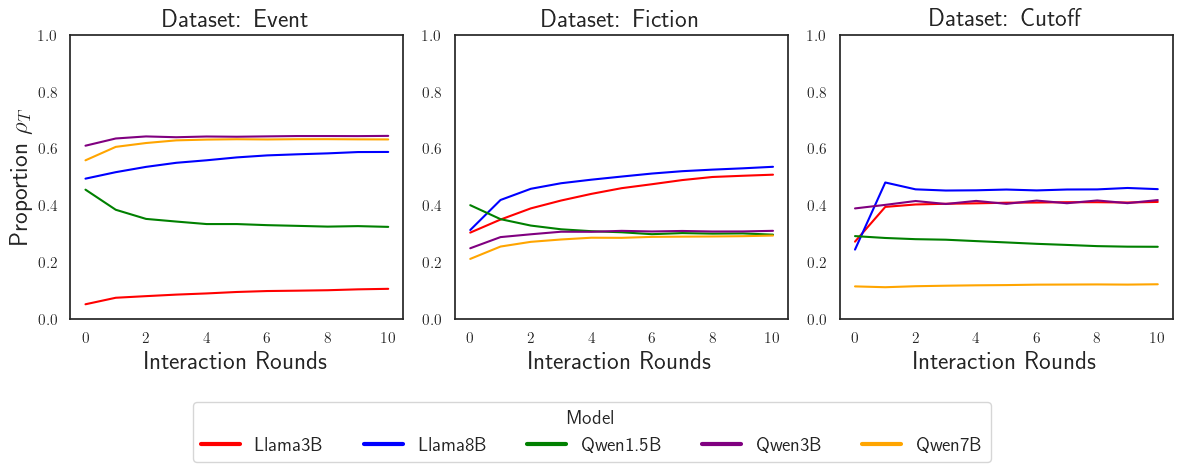

In [ ]:
# Generate LaTeX table
datasets = ['event','fiction','cutoff']
models = ['power_p1_A_k0_s0_100_llama3B','power_p1_A_k0_s0_100_llama8B','power_p1_A_k0_s0_100_Qwen1.5B','power_p1_A_k0_s0_100_Qwen3B','power_p1_A_k0_s0_100_Qwen7B']
line_styles_type = {
    'H': '--',
    'T': '-',
    'DK': '-.'
}
colors_line = [
    'red',
    'blue',
    'green',
    'purple',
    'orange'
]
# Collect statistics for each combination
fig, axs = plt.subplots(1, len(datasets), figsize=(12, 4))
results = {}
for i, data in enumerate(datasets):
    for j, model in enumerate(models):
        root_path = 'data/exps6_tmlr/'+data+"/"+model
        exps = os.listdir(root_path)
        json_exps = []
        for exp in exps:
            if exp.startswith('.'):
                continue
            json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
            json_exps.append(json_exp)
        
        map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
        map_func = np.vectorize(map_func)
  
        for l in ['T']: 
            axs[i].plot((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0),label=model.split('power_p1_A_k0_s0_100_')[1] + ' ' + l,linestyle=line_styles_type[l],color=colors_line[j])
        # axs[i,j].fill_between(range(len(diff.mean(axis=0))),
        #                     diff.mean(axis=0)-diff.std(axis=0),
        #                     diff.mean(axis=0)+diff.std(axis=0),
        #                     alpha=0.2)
            # axs[i].fill_between(range(len((np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0))),
            #                     (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)-(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
            #                     (np.array(map_func(json_exps))==l).mean(axis=1).mean(axis=0)+(np.array(map_func(json_exps))==l).mean(axis=1).std(axis=0),
            #                     alpha=0.2)
    axs[i].set_title('Dataset: '+data.capitalize(),fontsize=18)
    axs[i].set_ylim(0,1)
    axs[i].set_xlabel('Interaction Rounds', fontsize=18)
axs[0].set_ylabel('Proportion $\\rho_T$', fontsize=18)


# Legend for labels/colors
label_legend_elements = [
    Line2D([0], [0],color='gray', linestyle=line_styles_type['T'], lw=3, label='T (Red)'),
    Line2D([0], [0],color='gray', linestyle=line_styles_type['H'], lw=3, label='H (Blue)'),
    Line2D([0], [0],color='gray', linestyle=line_styles_type['DK'], lw=3, label='DK (Green)')
]

# Legend for heterogeneity/linestyles
hetero_legend_elements = [
    Line2D([0], [0], color=colors_line[0], linestyle='-', lw=3, label='Llama3B'),
    Line2D([0], [0], color=colors_line[1], linestyle='-', lw=3, label='Llama8B'),
    Line2D([0], [0], color=colors_line[2], linestyle='-', lw=3, label='Qwen1.5B'),
    Line2D([0], [0], color=colors_line[3], linestyle='-', lw=3, label='Qwen3B'),
    Line2D([0], [0], color=colors_line[4], linestyle='-', lw=3, label='Qwen7B')
]

# Combine into one legend
all_legend_elements =  hetero_legend_elements

fig.legend(
    handles=all_legend_elements,
    loc='lower center',
    ncol=8,
    title='Model',
    fontsize=14,
    title_fontsize=14,
    bbox_to_anchor=(0.5, -0.2)
)


plt.tight_layout()
plt.savefig('results/tmlr_results_exps6.png', dpi=300,bbox_inches='tight')
plt.show()


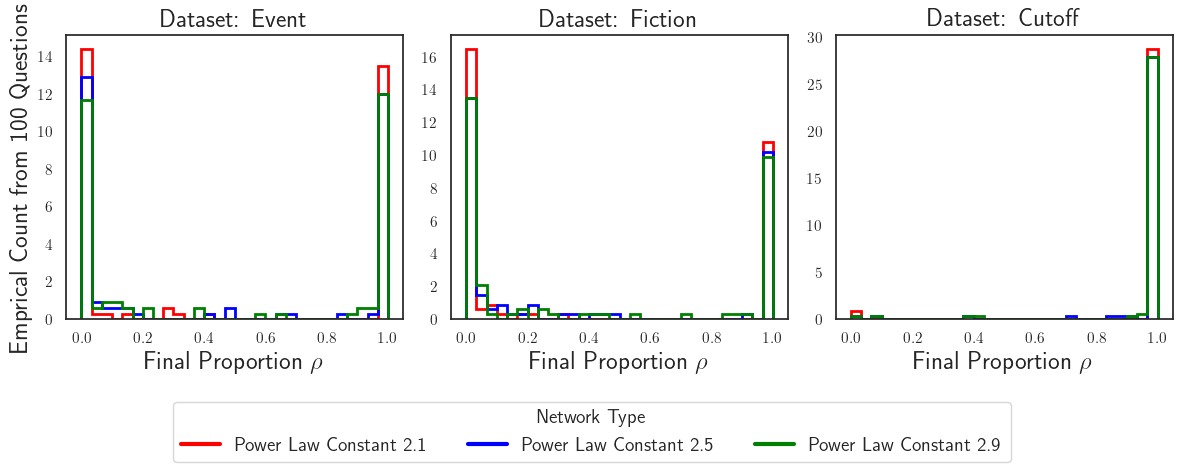

In [ ]:
# Generate LaTeX table
datasets = ['event','fiction','cutoff']
models = ['power21_A_k0_s0_100_llama8B','power25_A_k0_s0_100_llama8B','power29_A_k0_s0_100_llama8B']
graph_labels = ['Power Law Constant 2.1','Power Law Constant 2.5','Power Law Constant 2.9']
line_styles_type = {
    'H': '--',
    'T': '-',
    'DK': '-.'
}
colors_line = [
    'red',
    'blue',
    'green',
]
# Collect statistics for each combination
fig, axs = plt.subplots(1, len(datasets), figsize=(12, 4))
results = {}
for i, data in enumerate(datasets):
    for j, model in enumerate(models):
        root_path = 'data/exps7_tmlr/'+data+"/"+data+"_"+model
        exps = os.listdir(root_path)
        json_exps = []
        for exp in exps:
            if exp.startswith('.'):
                continue
            json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
            json_exps.append(json_exp)
        
        map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
        map_func = np.vectorize(map_func)
  
        for l in ['T']: 
            truth_values = (np.array(map_func(json_exps))==l).mean(axis=1)
            # truth_values = truth_values[truth_values[:,-1]>=0.3]
            axs[i].hist(truth_values[:,-1], bins=30, density=True, histtype="step", linewidth=2,linestyle=line_styles_type[l],color=colors_line[j])
            # axs[i].plot(truth_values,label=model.split('_A_k0_s0_100_')[0].split('power')[1] + ' ' + l,linestyle=line_styles_type[l],color=colors_line[j])
            # axs[i].fill_between(range(len(truth_values)),
            #                     truth_values-truth_values.min(axis=0),
            #                     truth_values+truth_values.max(axis=0),
                                # alpha=0.2,color=colors_line[j])
            
    axs[i].set_title('Dataset: '+data.capitalize(),fontsize=18)
    # axs[i].set_ylim(0,1)
    axs[i].set_xlabel('Final Proportion $\\rho$', fontsize=18)
axs[0].set_ylabel('Emprical Count from 100 Questions', fontsize=18)


# Legend for labels/colors
label_legend_elements = [
    Line2D([0], [0],color='gray', linestyle=line_styles_type['T'], lw=3, label='T (Red)'),
    Line2D([0], [0],color='gray', linestyle=line_styles_type['H'], lw=3, label='H (Blue)'),
    Line2D([0], [0],color='gray', linestyle=line_styles_type['DK'], lw=3, label='DK (Green)')
]

# Legend for heterogeneity/linestyles
hetero_legend_elements = [
    Line2D([0], [0], color=colors_line[i], linestyle='-', lw=3, label=graph_labels[i])
    for i in range(len(graph_labels))
]

# Combine into one legend
all_legend_elements =  hetero_legend_elements

fig.legend(
    handles=all_legend_elements,
    loc='lower center',
    title='Network Type',
    ncol=8,
    fontsize=14,
    title_fontsize=14,
    bbox_to_anchor=(0.5, -0.2)
)


plt.tight_layout()
plt.savefig('results/tmlr_results_exps7.png', dpi=300,bbox_inches='tight')
plt.show()


In [1]:
import pandas as pd

In [2]:
cutoff_dataset = pd.read_json("qa_dataset_fiction_v6.json")

In [3]:
cutoff_dataset['narrative_0']

0     CHAPTER I THE CHANCELLOR \nCHARLESTON, Septemb...
1     CHAPTER I THE CHANCELLOR \nCHARLESTON, Septemb...
2     CHAPTER I THE CHANCELLOR \nCHARLESTON, Septemb...
3     CHAPTER I THE CHANCELLOR \nCHARLESTON, Septemb...
4     CHAPTER I THE CHANCELLOR \nCHARLESTON, Septemb...
                            ...                        
95    CHAPTER I THE TUCKED-IN DAY Maizie wanted to s...
96    CHAPTER I THE TUCKED-IN DAY Maizie wanted to s...
97    CHAPTER I THE TUCKED-IN DAY Maizie wanted to s...
98    CHAPTER I THE CHANCELLOR \nCHARLESTON, Septemb...
99    CHAPTER I THE CHANCELLOR \nCHARLESTON, Septemb...
Name: narrative_0, Length: 100, dtype: object

In [4]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2").to("mps")
context_embeddings = []
for i in range(5):
    context_embedding = model.encode(cutoff_dataset['narrative_'+str(i)].values[i])
    context_embeddings.append(context_embedding)

question_embedding = model.encode(cutoff_dataset['hallucination_questions'].values)
answer_1_embedding = model.encode(cutoff_dataset['answer_0'].values)
answer_2_embedding = model.encode(cutoff_dataset['answer_1'].values)
aggregated_sum_embedding = question_embedding + answer_1_embedding + answer_2_embedding
for i in range(5):
    aggregated_sum_embedding = aggregated_sum_embedding + context_embeddings[i]


/Users/adit/.pyenv/versions/3.10.4/envs/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import os,json, numpy as np
data = "fiction"
model = "power25_A_k0_s0_100_llama8B"

root_path = 'data/exps7_tmlr/'+data+"/"+data+"_"+model
exps = os.listdir(root_path)
json_exps = []
for exp in exps:
    if exp.startswith('.'):
        continue
    json_exp = json.load(open(os.path.join(root_path, exp, 'ans.json'), 'r'))
    json_exps.append(json_exp)

map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
map_func = np.vectorize(map_func)
json_exp = map_func(json_exps)

In [6]:
color_map = (json_exp=='T')[:,:,-1].mean(axis=1)#=='T'

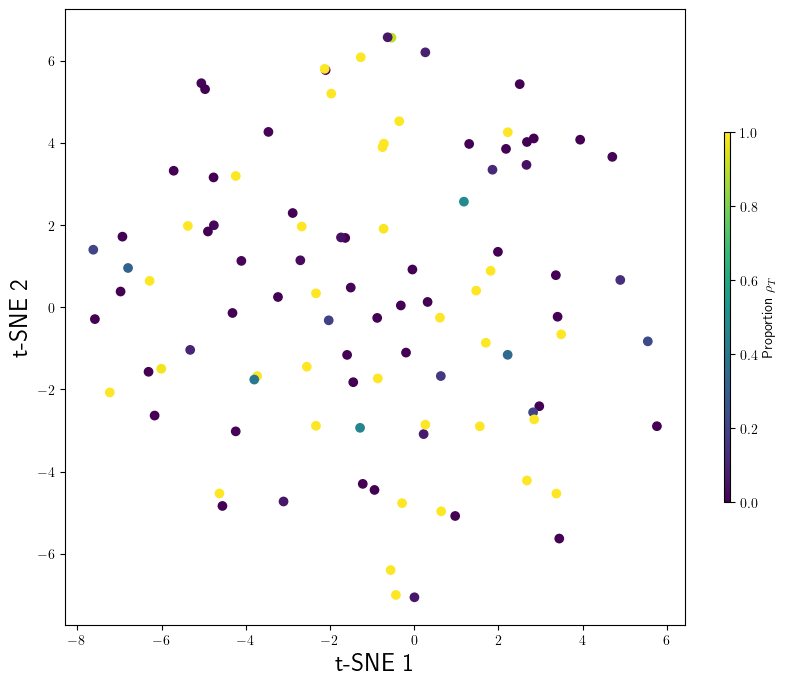

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(aggregated_sum_embedding)[:100,:]
# Create a scatter plot of the t-SNE results
fig, ax = plt.subplots(figsize=(10, 8))
col = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=color_map, cmap='viridis', alpha=1)
plt.xlabel('t-SNE 1', fontsize=18)
plt.ylabel('t-SNE 2', fontsize=18)

fig.colorbar(col, ax=ax, orientation="vertical", shrink=0.6, aspect=60, pad=0.05,label='Proportion $\\rho_T$')
plt.savefig('results/tmlr_results_exps8.png', dpi=300,bbox_inches='tight')
plt.show()

In [38]:
import json
import numpy as np
import matplotlib.pyplot as plt

perturbations = [
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [1,0,0],
    [1,1,0],
    [0,1,1],
    [1,0,1],
    [1,1,1]
]
perturbations = ["_".join([str(i) for i in perturbation]) for perturbation in perturbations]
convergence = np.zeros((len(perturbations),10,5,11))
for i in range(len(perturbations)):
    perturbation = perturbations[i]
    for question in range(10):
        for run in range(5):
            with open(f"perturbation_results/question_{question}/perturbation_{perturbation}/run_{run}/ans.json","r") as f:
                json_ans = json.load(f)
            json_ans = np.array(json_ans)
            map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
            map_func = np.vectorize(map_func)
            json_exp = map_func(json_ans)
            convergence[i,question,run,:] = (json_exp=='T').mean(axis=0)





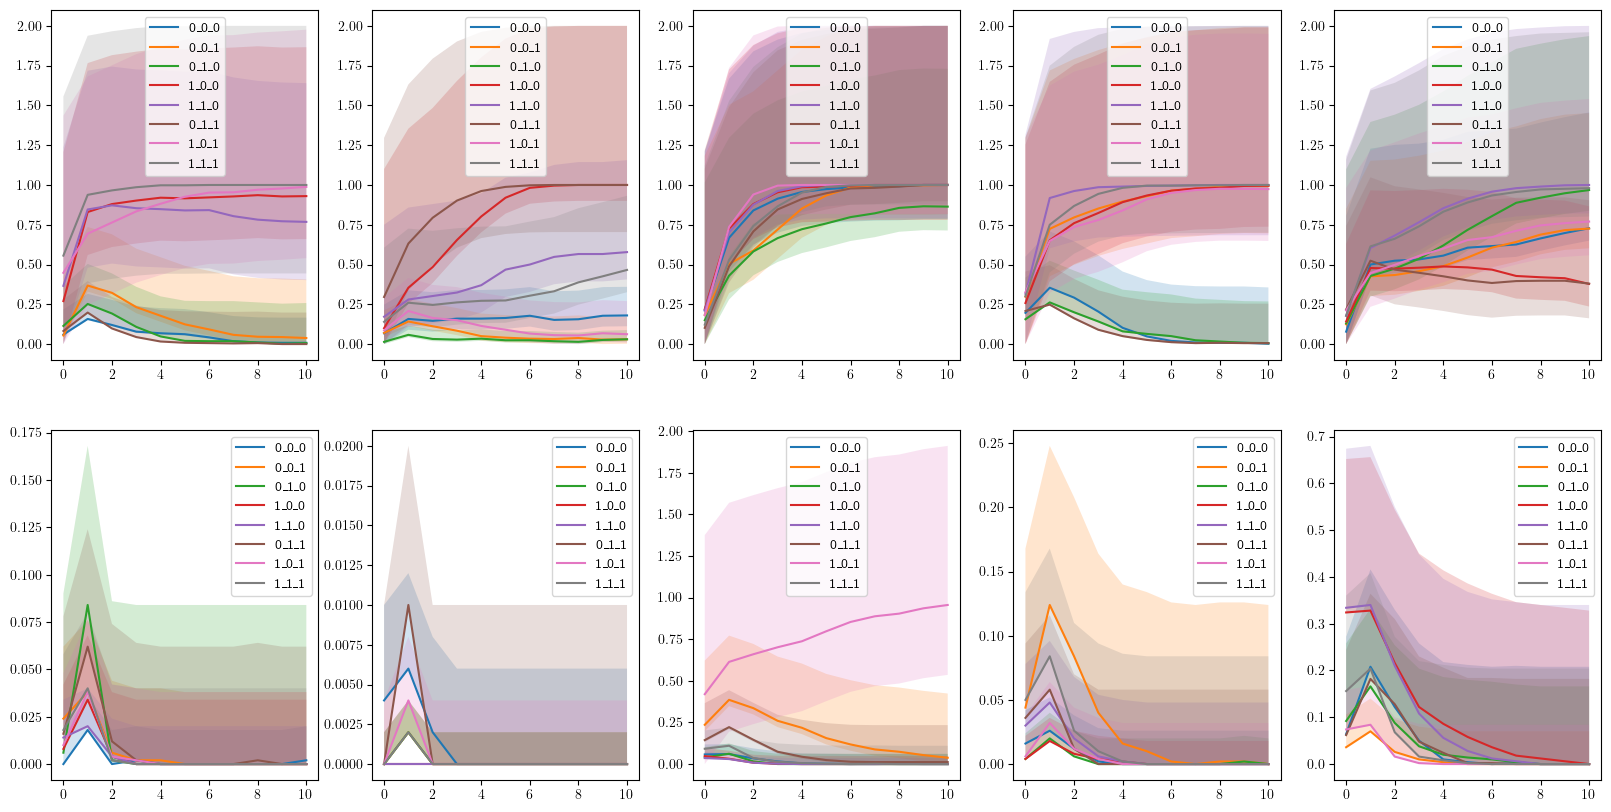

In [39]:
fig,ax = plt.subplots(2,5,figsize=(20,10))
for i in range(2):
    for j in range(5):
        question = i*5+j
        question_data = convergence.mean(axis=2)[:,question]
        ax[i,j].plot(np.arange(11),question_data.T,label = perturbations)
        for k in range(len(perturbations)):
            ax[i,j].fill_between(np.arange(11),question_data[k]-question_data[k].min(axis=0),question_data[k]+question_data[k].max(axis=0),alpha=0.2)
        ax[i,j].legend()
plt.show()


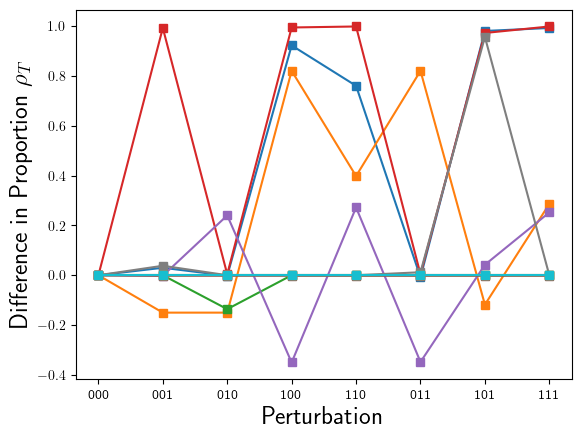

In [44]:
markers = ['o','s','D','P','X','*','+','x','D','P','X','*','+','x']
perturbation_labels = ['000','001','010','100','110','011','101','111']
for question in range(10):
    question_data = convergence.mean(axis=2)[:,question,-1] - convergence.mean(axis=2)[0,question,-1]
    plt.plot(np.arange(8),question_data,marker='s')
plt.xticks(np.arange(8),perturbation_labels)
plt.ylabel('Difference in Proportion $\\rho_T$',fontsize=18)
plt.xlabel('Perturbation',fontsize=18)
plt.savefig('results/tmlr_results_exps9.png', dpi=300,bbox_inches='tight')
plt.show()

In [9]:
answers = "/Users/adit/Downloads/Archive/llm_network_tmlr/data/exps1_tmlr/cutoff_len50/0/ans.json"
import json
import numpy as np
with open(answers, 'r') as f:
    data = json.load(f)

print(data)

map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
map_func = np.vectorize(map_func)
json_exp = map_func(data)
print(json_exp)




[['C', "I don't know", 'C', "I don't know", "I don't know", 'A', 'C', 'C', 'C', 'C', 'B'], ["I don't know", 'A', 'C', "I don't know", 'C', 'A', 'A', 'A', "I don't know", 'B', 'C'], ['C', 'C', 'C', "I don't know", 'C', 'B', 'A', 'C', 'C', 'B', "I don't know"], ['C', 'C', 'B', 'C', 'B', 'C', 'C', 'B', 'C', "I don't know", 'B'], ["I don't know", 'B', 'B', "I don't know", 'C', 'C', 'C', 'B', "I don't know", 'B', 'A'], ['B', "I don't know", "I don't know", 'A', "I don't know", 'B', 'C', 'A', 'C', 'B', "I don't know"], ['B', 'B', "I don't know", 'A', 'C', 'B', "I don't know", 'A', "I don't know", 'C', 'C'], ["I don't know", 'C', 'B', "I don't know", "I don't know", 'C', "I don't know", "I don't know", 'C', 'B', 'B'], ["I don't know", 'A', 'B', 'B', "I don't know", 'B', 'A', 'C', "I don't know", 'B', "I don't know"], ['C', "I don't know", "I don't know", "I don't know", 'A', "I don't know", 'C', 'C', "I don't know", 'C', "I don't know"], ['C', 'B', 'C', "I don't know", 'B', 'C', 'B', 'B', 'C'

In [ ]:
import networkx as nx
network = np.load("utils/adj_100.npy")
network = nx.from_numpy_array(network)
print(network.nodes())
print(network.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[(0, 82), (0, 3), (0, 29), (0, 43), (0, 69), (0, 77), (1, 7), (1, 74), (1, 24), (1, 37), (1, 47), (1, 64), (1, 77), (1, 97), (2, 78), (2, 48), (2, 58), (2, 77), (2, 81), (2, 93), (3, 8), (3, 14), (3, 25), (3, 26), (3, 49), (3, 69), (3, 83), (3, 6), (3, 23), (3, 97), (4, 7), (4, 38), (4, 39), (4, 43), (4, 44), (4, 45), (4, 51), (4, 63), (4, 68), (4, 72), (4, 79), (4, 98), (4, 77), (4, 94), (5, 80), (5, 45), (5, 47), (5, 64), (5, 77), (5, 88), (5, 93), (6, 12), (6, 19), (6, 40), (6, 77), (6, 96), (7, 38), (7, 94), (7, 53), (7, 55), (7, 77), (7, 81), (8, 96), (8, 13), (8, 62), (9, 88), (9, 46), (9, 77), (

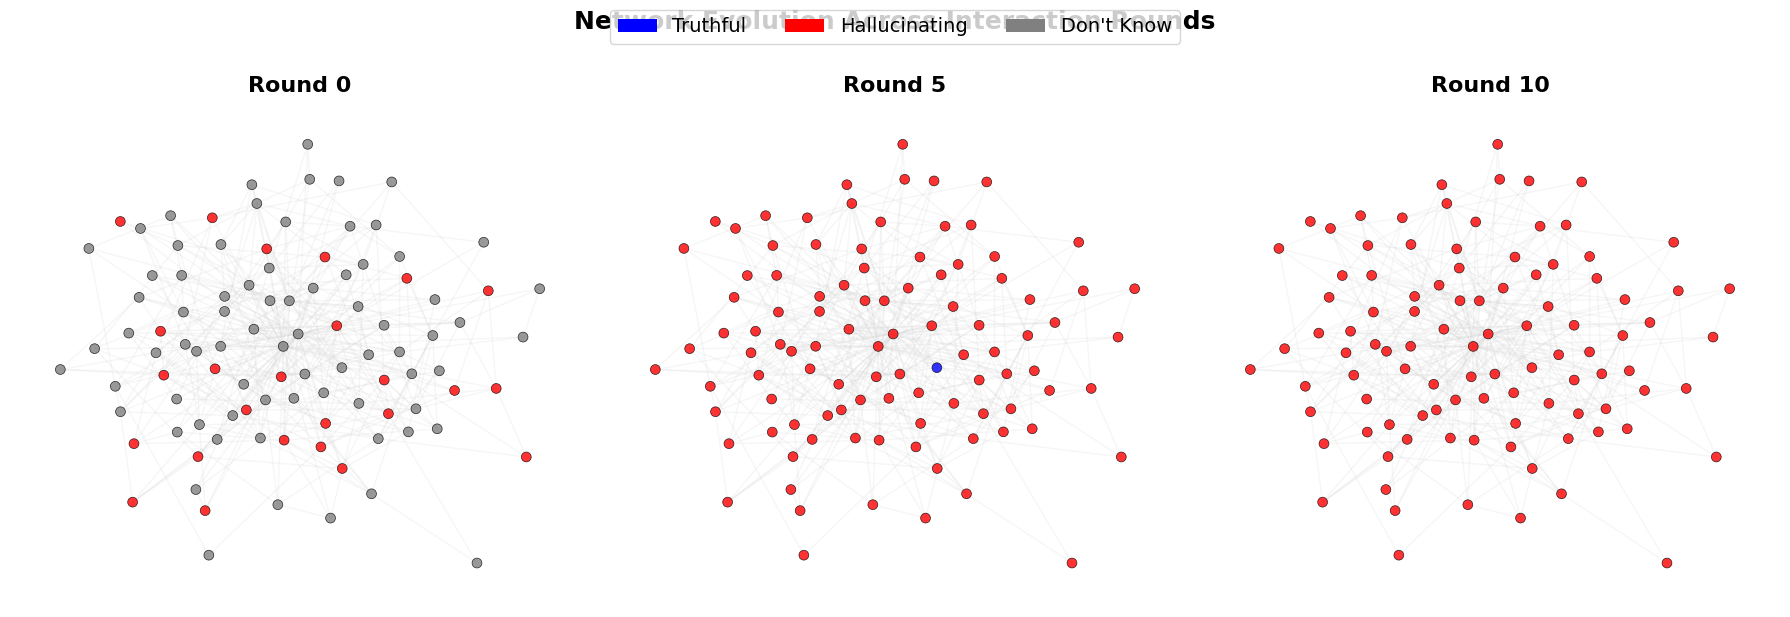

In [10]:
### plot the evolution 
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import json

# Load answers data
answers_path = "/Users/adit/Downloads/Archive/llm_network_tmlr/data/exps1_tmlr/cutoff_len1/0/ans.json"
with open(answers_path, 'r') as f:
    answers_data = json.load(f)

# Map answers to T, H, DK
map_func = lambda x: 'T' if 'A' in x else 'H' if ('B' in x or 'C' in x) else 'DK'
map_func = np.vectorize(map_func)
mapped_answers = map_func(answers_data)

# Load network
network_adj = np.load("utils/adj_100.npy")
G = nx.from_numpy_array(network_adj)

# Select 3 time stamps (rounds 0, 5, 10)
time_stamps = [0, 5, 10]
num_rounds = mapped_answers.shape[1]

# Adjust time stamps if needed
time_stamps = [min(ts, num_rounds - 1) for ts in time_stamps]

# Color mapping
color_map = {'T': 'blue', 'H': 'red', 'DK': 'gray'}

# Create figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Compute layout once (use spring layout for better visualization)
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

for idx, time_stamp in enumerate(time_stamps):
    ax = axs[idx]
    
    # Get answers at this time stamp
    answers_at_time = mapped_answers[:, time_stamp]
    
    # Create node color list
    node_colors = [color_map[answer] for answer in answers_at_time]
    
    # Draw network
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.2, edge_color='lightgray', width=1)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_colors, 
                           node_size=50, alpha=0.8, edgecolors='black', linewidths=0.5)
    
    ax.set_title(f'Round {time_stamp}', fontsize=16, fontweight='bold')
    ax.axis('off')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map['T'], label='Truthful'),
                   Patch(facecolor=color_map['H'], label='Hallucinating'),
                   Patch(facecolor=color_map['DK'], label="Don't Know")]
fig.legend(handles=legend_elements, loc='upper center', ncol=3, fontsize=14, frameon=True)

plt.suptitle('Network Evolution Across Interaction Rounds', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()